# What Sentiment Analysis Can Reveal About Common Speech Patterns

## Digital Humanities 140 Coding for Humanities with Professor Winjum at UCLA Winter 2022

#### 3/14/2022 | Crystal Huynh, Larry Qu, Nelson Truong

- You have some intriguing results where negative reviews get a very positive score from vader, and similarly for positive reviews getting very negative scores. It may be worth printing out a couple examples to see if you can figure out why they were mislabeled. 

- You should calculate how accurate the positive and negative sentiment scores of vader are over the entire dataset. 
 
- Using sentiwordnet to do further sentiment scoring would be an added bonus, and you could see how the two sentiment scoring methods compare.

- need to check if the compound polarity score matches the sentiment labeled in the og dataset. if it doesnt analyze why

- maybe remove words like move and film from our word frequency analysis since they are more neutral


### Introduction
(an overview of your entire project, your research topic and question, your motivation to study this topic, and any prior related work) (will delete these directions later)

#### Project Overview
This project analyzes the sentiment of a movie reviews dataset using Python through Jupyter Notebooks. 

#### Research Question: What common speech patterns can be found in positive and negative commentary?
Our group wanted to explore how people tend to speak when talking in an extremely positive and negative manner, especially in the context of movie reviews. Are there specific words that are frequently used when speaking in a positive sentiment versus a negative one? How often do those words show up in speech? How polarizing are these frequently used words? Do people tend to speak more when they are feeling positive or negative about something? This is the first step that we want to take when analyzing the speech patterns of movie reviews.

#### Why It Matters
With this information, we can later see whether these patterns match typical human behavior/speech, or if they are more specific in an online, more anonymous environment. We can use our findings to potentially see how polarizing these spaces are and how they affect our society in the long run as this type of analysis can also be used on things like social media comments and news articles where commentary can be even more polarizing. As we explore speech patterns in settings outside of normal, in person conversation, we can get a better idea of how people truly think and feel in certain environments or how people will think and feel given what we already know. 

### Methods
(explain your data and your analytical process)

#### Data Source
[IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

[More Dataset Information](http://ai.stanford.edu/~amaas/data/sentiment/)

We are using the IMDB Dataset of 50K Movie Reviews Large Movie Review Dataset from kaggle which contains 50K movie reviews. This dataset can be used for binary sentiment classification as it contains highly polar positive and negative movie reviews for training and testing.

The dataset contains two columns, one which contains the movie review text and the other with its corresponding sentiment categorization of positive or negative. Both the review and sentiment columns are object data types which represent strings.

We also need to acknowledge the shortcomings of our dataset. Although there is not much information on where the reviews are from, we can assume the reviews cover multple movies. With that being said, we also do not know what time period these reviews are from, the criteria for being described as "highly polar", or the backgrounds of the people who made these reviews. The context in which these reviews were made would have provided more insight into common behavioral patterns.  

[Negative Words](https://gist.github.com/mkulakowski2/4289441)

[Positive Words](https://gist.github.com/mkulakowski2/4289437)

In order to indentify the positive and negative words, we can easily scan the web for premade datasets. These two shown above are datasets containing negative and positive words, respectively, that we can use to analyze our movie reviews with. These datasets may help us recognize whether a review is actually negative/positive based on the words used, the most common words used in a negative/positive statement, how the context matters when using negative/positive words, and other speech patterns.

#### Project Scope
The intended analysis is to see what are the common "positive" and "negative" words being used and how often they are used. The resulting visualizations for this would probably be something like a bar chart highlighting the ten most common "positive" and "negative" words and how often they appear in the dataset. We can also how long "positive" reviews are compared to "negative" reviews by checking the word count for each review and plotting the total word count frequency in a separate bar chart. Another analysis we could do is categorize common "positive" and "negative" words to see how polarizing they really are and plot this on another bar chart to visualize the scale of how positive "positive" reviews are and how negative "negative" reviews are.

#### Analytical Process
We will first start by exploring our dataset as a whole to better understand how we can utilize the data we have to answer our research question. We know that the dataset contains both positive and negative reviews, so we will also explore the positive and negative reviews separately. When looking at positive and negative reviews separately, we'll run code to calculate a sentiment score on each review to compare the score with the original sentiment categorization. We'll also conduct a word frequency analysis to see what kinds of words are bing used in a negative/positive context.

add more

#### Expected Insights
We expect to see more polarizing "positive" and "negative" reviews to be lengthier in word count as people tend to speak more than they are feeling extremely "positive" or "negative" which is typical in normal, everyday, real life behavior. However, many people tend to not show their true thoughts and feelings when speaking in public, so perhaps in spaces like movie reviews, people's wording may be more polarizing than if they were to be giving the review in person. In other words, their online, anonymous reviews may be a lot more emotional and biased than what people would typically say aloud. We might see that although online commentary may reflect human behavior in that it represents what people actually are thinking and feeling, it may not be representative of what people would normally say to others. However, organizations can use these findings to gauge a more truthful reaction from the public for their respective initiatives and campaigns to see what they need to improve upon in order to generate a positive response.

### Results 
(lay out your data exploration, your findings, and your visuals)

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import vader
nltk.download('vader_lexicon')
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Data Exploration

In this section, we will be taking a closer look into our dataset to better understand the information it provides and how we can utilize it in our analysis to answer our research question.

In [3]:
#turn the csv file into a dataframe
imdb_df = pd.read_csv('IMDB Dataset.csv')
imdb_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
# summary information about the dataframe
imdb_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
# how many reviews are labeled positive vs. negative
imdb_df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

#### Overall Word Frequency

Now that we have a better idea of our dataset in that it contains reviews labeled as positive or negative and that there are an equal amount of each, we can separate the two and conduct more in depth exploratory analysis. By taking a closer look at the positive and negative reviews separately, we will be able to set the foundation for our formal analysis. Let's start by looking at word frequency.

In [6]:
#most common words used for positive and negative sentiments
#positiveReviews = []
#negativeReviews = []
positiveText = ""
negativeText = ""


for i in range(len(imdb_df['review'])):
    if imdb_df['sentiment'][i] == "positive":
        #positiveReviews.append(imdb_df['review'][i])
        positiveText += " " + imdb_df['review'][i]
    else:
        #negativeReviews.append(imdb_df['review'][i])
        negativeText += " " + imdb_df['review'][i]

#print(positiveReviews[:5])

#tokenize the words
sent = sent_tokenize(positiveText)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)
        
#remove stopwords
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i)
        
print("30 most common words in positive reviews")

tmcPos = []
freq = FreqDist(wordsNoStop)
for j in sorted(freq, key=freq.get, reverse=True)[:30]:
    print(j,freq[j])
    tmcPos.append(j)
    
positiveFreq = freq

#tokenize the words
sent = sent_tokenize(negativeText)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)
        
#remove stopwords
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i)
        
print("30 most common words in negative reviews")

tmcNeg = []

negfreq = FreqDist(wordsNoStop)
for j in sorted(negfreq, key=negfreq.get, reverse=True)[:30]:
    print(j,negfreq[j])
    tmcNeg.append(j)

onlyPositive = []
onlyNegative = []
both = set()
for myind in range(30):
    if tmcNeg[myind] not in tmcPos:
        onlyNegative.append(tmcNeg[myind])
    elif tmcPos[myind] not in tmcNeg:
        onlyPositive.append(tmcPos[myind])
    else:
        both.add(tmcPos[myind])
        both.add(tmcNeg[myind])

print("words that are only commonly used in positive reviews")
print(onlyPositive)

print("words that are only commonly used in negative reviews")
print(onlyNegative)

print("words that are commonly used in both negative and positive reviews")
print(both)

#onlyPositive = []
#for pword in freq:
#    if pword not in negfreq:
#        onlyPositive.append((pword, freq[pword]))
        
#onlyNegative = []
#for negword in negfreq:
#    if negword not in freq:
#        onlyNegative.append((negword, freq[negword]))
        
#onlyPositive.sort(key = lambda x: -1*x[1]) 
#onlyNegative.sort(key = lambda x: -1*x[1]) 

    
#print("30 most common words in positive reviews")
#print(onlyPositive[:30])

#print("30 most common words in negative reviews")
#print(onlyNegative[:30])

30 most common words in positive reviews
br 97952
's 63028
film 40162
movie 36180
'' 32033
`` 31520
n't 26486
one 23978
like 16425
good 13826
story 12112
great 11825
time 11623
see 11514
would 11099
really 10446
well 10036
also 9379
much 8777
even 8333
first 8297
people 8178
get 8029
... 7940
love 7771
best 7587
way 7467
films 7305
many 7089
life 7078
30 most common words in negative reviews
br 103996
's 58740
movie 47633
n't 39444
film 35779
`` 34504
'' 34060
one 23114
like 21246
would 15033
good 13756
bad 13415
even 13370
really 11821
... 11805
time 11324
could 11134
see 10351
get 9794
much 9678
story 9510
people 8907
make 8899
made 8346
movies 7798
plot 7696
acting 7659
way 7277
characters 7093
first 7060
words that are only commonly used in positive reviews
['also', 'films', 'life']
words that are only commonly used in negative reviews
['bad', 'could', 'make', 'made', 'movies', 'plot', 'acting', 'characters']
words that are commonly used in both negative and positive reviews
{'stor

So, what do these words tell us?

Here we found the 30 most common words used in positive reviews and the 30 most common words used in negative reviews. For both, we see that our code is counting "br', "'s", and "''" which aren't words and symbols that reveal anything of use to our research. We also see more neutral words like "movie" and "film" which provide context rather than reveal much about the sentiment of the review. This tells us that we'll need to do some cleaning before we can conduct a word frequency analysis that will be meaningful, i.e. if we want to find the top 10 most commonly used words in negative/positive reviews. 

If we ignore these "words", we can take a first look at the other, more meaningful words that were listed. For positive reviews, we can see words like "like", "good", "great", "love", and "best" which are commonly associated with positive statements. For negative reviews, we only really see "bad" as a word that is commonly associated with negative statements. Interestinly enough, most of the common words found in the negative reviews are words associated with the film itself like "plot", "story", "acting", and "characters" which may be an indication that reviews tends to be more critical in a constructive sense rather than an outburst of how horrible the film was.

Also, we can see that many words are commonly used in both negative and positive reviews. As we can see in the Python output above, words such as "good", "film", "like" are commonly used in both bad and good reviews. This is because words such as "film" are purely descriptive, since all reviews will be talking about the film. Surprisingly, the word "good" shows up in negative reviews as well, although on further analysis one can deduce that this can stem from phrases such as "not very good" that are used negatively. Similarly, even though the word "like" is generally regarded as positive, it can be used negatively as well, such as in the phrase "I didn't like the film". Therefore, although many words lean towards good or bad when taken at face value, context matters a lot in their true meaning in reviews.

Another thing we noticed with this initial word frequency analysis was that the code itself was taking a while to run because the dataset was too large. We originally thought the dataset would be a decent sized sample of reviews, but because of the long runtime, we did not want our analysis to get stuck on a particular cell of code. As a result, we decided to use a smaller sample from the dataset and extrapolate our findings at the end of our analysis. 

Expanding upon the previous section where we looked at the 30 most frequent words in positive and negative reviews, we tried to create data visualizations to better represent these differences, using a smaller and cleaner sample of reviews. Let's first clean out the "words" and symbols that distract from our analysis.

In [7]:
# Compile first 1000 reviews into one giant string
reviews = ""
for ind in range(1000):
    reviews = reviews + " " + imdb_df["review"][ind]
    
# Create a list of stop words
stop_words = stopwords.words("english") + list(punctuation)

# Tokenize and convert all the reviews to lowercase
words = word_tokenize(reviews.lower())

# Remove all unwanted words
completewords = [w for w in words if w not in stop_words]

# Lemmatize the list of words
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]

# Find the frequency of all words
freq = FreqDist(completestemmed)

# Turn this list into a pandas dataframe
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
    
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})
df

,wordlist,wordfreq
0,br,4124
1,'s,2349
2,movie,2056
3,film,1770
4,``,1285
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


In [8]:
# Purge weird words
df = df.drop(labels=0)
df = df.drop(labels=1)
df = df.drop(labels=4)
df = df.drop(labels=5)
df = df.drop(labels=6)
df = df.drop(labels=26)
df

,wordlist,wordfreq
2,movie,2056
3,film,1770
7,one,1012
8,like,785
9,get,552
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


In [9]:
#view 30 most common words
df[:30]

,wordlist,wordfreq
2,movie,2056
3,film,1770
7,one,1012
8,like,785
9,get,552
10,time,543
11,character,532
12,would,528
13,see,528
14,good,524


Here we have cleaned our dataset so that meaningless letters and symbols will no longer be included in our word frequency analysis. Let's continue with our exploratory analysis on word frequency.

In [10]:
# Mean
df['wordfreq'].mean()

6.483727970591415

In [11]:
# which words have a word freq of 6 and 7
mean6 = df[df['wordfreq'] == 6] 
mean6[:10]

,wordlist,wordfreq
2821,security,6
2822,stare,6
2823,performed,6
2824,terribly,6
2825,grown,6
2826,love.,6
2827,meaningless,6
2828,mattei,6
2829,vivid,6
2830,loneliness,6


In [12]:
# which words have a word freq of 6 and 7
mean7 = df[df['wordfreq'] == 7] 
mean7[:10]

,wordlist,wordfreq
2543,sold,7
2544,johanson,7
2545,soap,7
2546,portrait,7
2547,connect,7
2548,connected,7
2549,noble,7
2550,davis,7
2551,quit,7
2552,mildly,7


In [13]:
# Median
df['wordfreq'].median()

1.0

In [14]:
# Mode
df['wordfreq'].mode()

0    1
dtype: int64

What do these values tell us?

The mean tells us that the word frequency value is on average 6.5, or since word frequency has to be a whole number, between 6 and 7. This means that the many of the words in this dataframe are used a total of 6-7 times which tells us that there are some words people tend to use more often in the context of movie reviews.

The median tells us the middle value for wordfrequency, and in this case it is 1.0. This tells us that we have a lot of words that are only used once throughtout the whole dataframe of reviews.

The mode is the most commonly seen word frequency value, and in this case, it is 1. This makes sense because of our median value that tells us there are a lot of words that only appear once. So, the median and the mode tell us that a word frequency of 1 is the most common word frequency value in our dataframe of common words. 

Now that we have a better understanding of our dataset, we can begin visualizing these word frequency exploration findings using plots.

<AxesSubplot:ylabel='Frequency'>

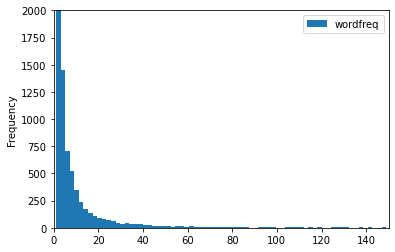

In [15]:
# Histogram of word frequency values
df.plot.hist(bins=1000, xlim=(0, 150), ylim=(0,2000))

This histogram shows the distribution of word frequency values, and we can see that most words are used less than 20 times and only a few words are used hundreds of times.

<AxesSubplot:ylabel='wordlist'>

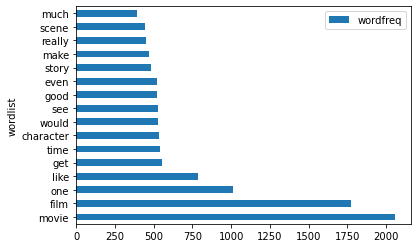

In [16]:
# Barchart of the 17 most frequent words
bar_df = df.loc[0:20, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq")
#ax = bar_df.plot.bar(x='wordlist', y='wordfreq', rot=0)

We can also use a bar chart to visually compare how many times the most common words are being used in our dataset. Again, very few words are in the thousands in terms of word frequency value. This chart only shows the 17 most frequent words, and most of them are used around 500 times. Comparing this chart with the histogram allows us to understand that most of the words in our dataset are not used hundreds of times. rewrite this i dont like it

<AxesSubplot:ylabel='wordlist'>

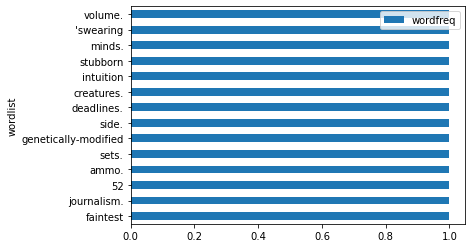

In [17]:
# Barchart of the 19 least frequent words
#this barchart isnt as helpful, should replace with something else
bar_df = df.loc[18490:, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq")

# need to find all words with only a freq of 1

since there are a lot of words that only appear once, we can list them all out here:

In [18]:
df.loc[df['wordfreq'] == 1]

,wordlist,wordfreq
8816,timid,1
8817,penitentary,1
8818,emerald,1
8819,inwards,1
8820,privacy,1
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


In [19]:
df.loc[df['wordfreq'] < 5]

,wordlist,wordfreq
3853,me.,4
3854,hearted,4
3855,experimental,4
3856,em,4
3857,muslim,4
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


stuffs

With our cleaned dataframe of words, we can run our previous code again to retrieve a better list of the most commonly used words in positive and negative reviews. We'll do that in the Positive Reviews and Negative Reviews Section. Let's first do a bit more exploratory sentiment analysis to get a better sense of the dataset as a whole.

#### Overall Word Sentiment

In order to get a better gauge of the most frequently used words that will help with our sentiment analysis, we will also need to ignore words like "movie", "film", "characters", and "scene" that provide more context about the review and are common in both positive and negative reviews. Essentially, any words that are more neutral will not provide the information we need for our research. So, let's find the sentiment values of our most common words to differentiate neutral, positive, extremeley positive, negative, and extremely negative words in our dataset.

In [20]:
# Sentiment value of each word
sia = vader.SentimentIntensityAnalyzer()
k = 0
newwordlist = []
words_sentiments = []
for index, row in df.iterrows():
    word = df["wordlist"].iloc[k]
    #print(word + "'s compound polarity score is " + str(sia.polarity_scores(word)["compound"]))
    words_sentiments.append(sia.polarity_scores(word)["compound"])
    newwordlist.append(word)
    k+=1

words_sentiment_df = pd.DataFrame({'wordlist':newwordlist, 'wordsent':words_sentiments})
words_sentiment_df[:30]

,wordlist,wordsent
0,movie,0.0000
1,film,0.0000
2,one,0.0000
3,like,0.3612
4,get,0.0000
5,time,0.0000
6,character,0.0000
7,would,0.0000
8,see,0.0000
9,good,0.4404


In [109]:
# Find the most polarizing words - negative and positive
k = 0
positive_words = []
negative_words = []
positive_word_sentiments = []
negative_word_sentiments = []
for index, row in words_sentiment_df.iterrows():
    word = words_sentiment_df["wordlist"].iloc[k]
    if words_sentiment_df["wordsent"].iloc[k] > .5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        positive_word_sentiments.append(sia.polarity_scores(word)["compound"])
        positive_words.append(word)
        #print("The most positive words are:")
    elif words_sentiment_df["wordsent"].iloc[k] < -.5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        negative_word_sentiments.append(sia.polarity_scores(word)["compound"])
        negative_words.append(word)
        #print("The most negative words are:")
    k+=1

#print ("The positive words are:" + str(positive_words))
#print ("The negative words are:" + str(negative_words))
positive_df = pd.DataFrame({'wordlist':positive_words, 'wordsent':positive_word_sentiments})
positive_df = positive_df.sort_values(by='wordsent', ascending=False)
print ("The positive words are:")
print (positive_df[:30])
negative_df = pd.DataFrame({'wordlist':negative_words, 'wordsent':negative_word_sentiments})
negative_df = negative_df.sort_values(by='wordsent', ascending=True)
print ("The negative words are:")
print (negative_df[:30])

The positive words are:
          wordlist  wordsent
185  magnificently    0.6597
119     sweetheart    0.6486
1             best    0.6369
2             love    0.6369
29       perfectly    0.6369
19        greatest    0.6369
79         freedom    0.6369
81           love.    0.6369
146          'love    0.6369
129           glee    0.6369
102       glorious    0.6369
103          best.    0.6369
112       paradise    0.6369
121     excellence    0.6249
120         joyous    0.6249
23     masterpiece    0.6249
127    excellently    0.6249
162   masterpiece.    0.6249
180       awesome.    0.6249
206         great.    0.6249
208        superb.    0.6249
24          superb    0.6249
0            great    0.6249
21         awesome    0.6249
145   brilliantly.    0.6124
172      brightest    0.6124
55        gorgeous    0.6124
179    perfectness    0.6124
161       heavenly    0.6124
203       splendor    0.6124
The negative words are:
        wordlist  wordsent
119       rapist   -0.7096

In [22]:
# Find the extreme polarizing words - negative and positive
k = 0
max_pos_words = []
max_neg_words = []
for index, row in words_sentiment_df.iterrows():
    word = words_sentiment_df["wordlist"].iloc[k]
    if words_sentiment_df["wordsent"].iloc[k] > .7:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        max_pos_words.append(words_sentiment_df["wordlist"].iloc[k])
        #print("The most positive words are:")
    elif words_sentiment_df["wordsent"].iloc[k] < -.7:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        max_neg_words.append(words_sentiment_df["wordlist"].iloc[k])
        #print("The most negative words are:")
    k+=1

print ("The extremely positive words are:" + str(max_pos_words))
print ("The extremely negative words are:" + str(max_neg_words))

The extremely positive words are:[]
The extremely negative words are:['rapist', 'slavery']


analysis stuffs

<AxesSubplot:ylabel='Frequency'>

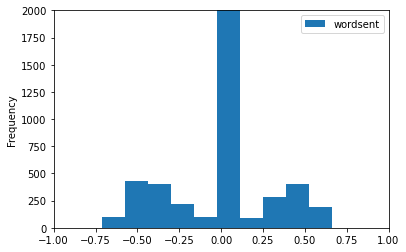

In [23]:
# Histogram of word sentiment values
words_sentiment_df.plot.hist(bins=10, xlim=(-1, 1), ylim=(0,2000))

analysis stuffs

Now that we have a better sense of what we want to look for and the overall dataset, we can conduct more specific analysis on positive and negative reviews separately to compare and contrast the most commone words being used, the average sentiment, etc.

#### Positive Reviews - Word Frequency 
fluff about next section on positive reviews

In [83]:
# Look only at the first 1000 positive reviews
reviews = ""
for ind in range(5000):
    if imdb_df["sentiment"][ind] == "positive":
        reviews = reviews + " " + imdb_df["review"][ind]
stop_words = stopwords.words("english") + list(punctuation)
words = word_tokenize(reviews.lower())
completewords = [w for w in words if w not in stop_words]
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]
freq = FreqDist(completestemmed)
poswordlist = []
poswordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    poswordlist.append(i)
    poswordfreq.append(freq[i])
pos_df = pd.DataFrame({'wordlist':poswordlist, 'wordfreq':poswordfreq})
pos_df

,wordlist,wordfreq
0,br,9788
1,'s,6235
2,film,4601
3,movie,4401
4,'',2898
...,...,...
30944,code-breakers,1
30945,bletchly,1
30946,emerged,1
30947,makers.,1


In [84]:
# Clean up the dataframe and remove weird words
pos_df = pos_df.drop(labels=0)
pos_df = pos_df.drop(labels=1)
pos_df = pos_df.drop(labels=4)
pos_df = pos_df.drop(labels=5)
pos_df = pos_df.drop(labels=7)
pos_df = pos_df.drop(labels=26)
pos_df[:30]

,wordlist,wordfreq
2,film,4601
3,movie,4401
6,one,2718
8,like,1701
9,time,1448
10,good,1423
11,story,1372
12,character,1307
13,see,1263
14,great,1222


fluff

<AxesSubplot:ylabel='wordlist'>

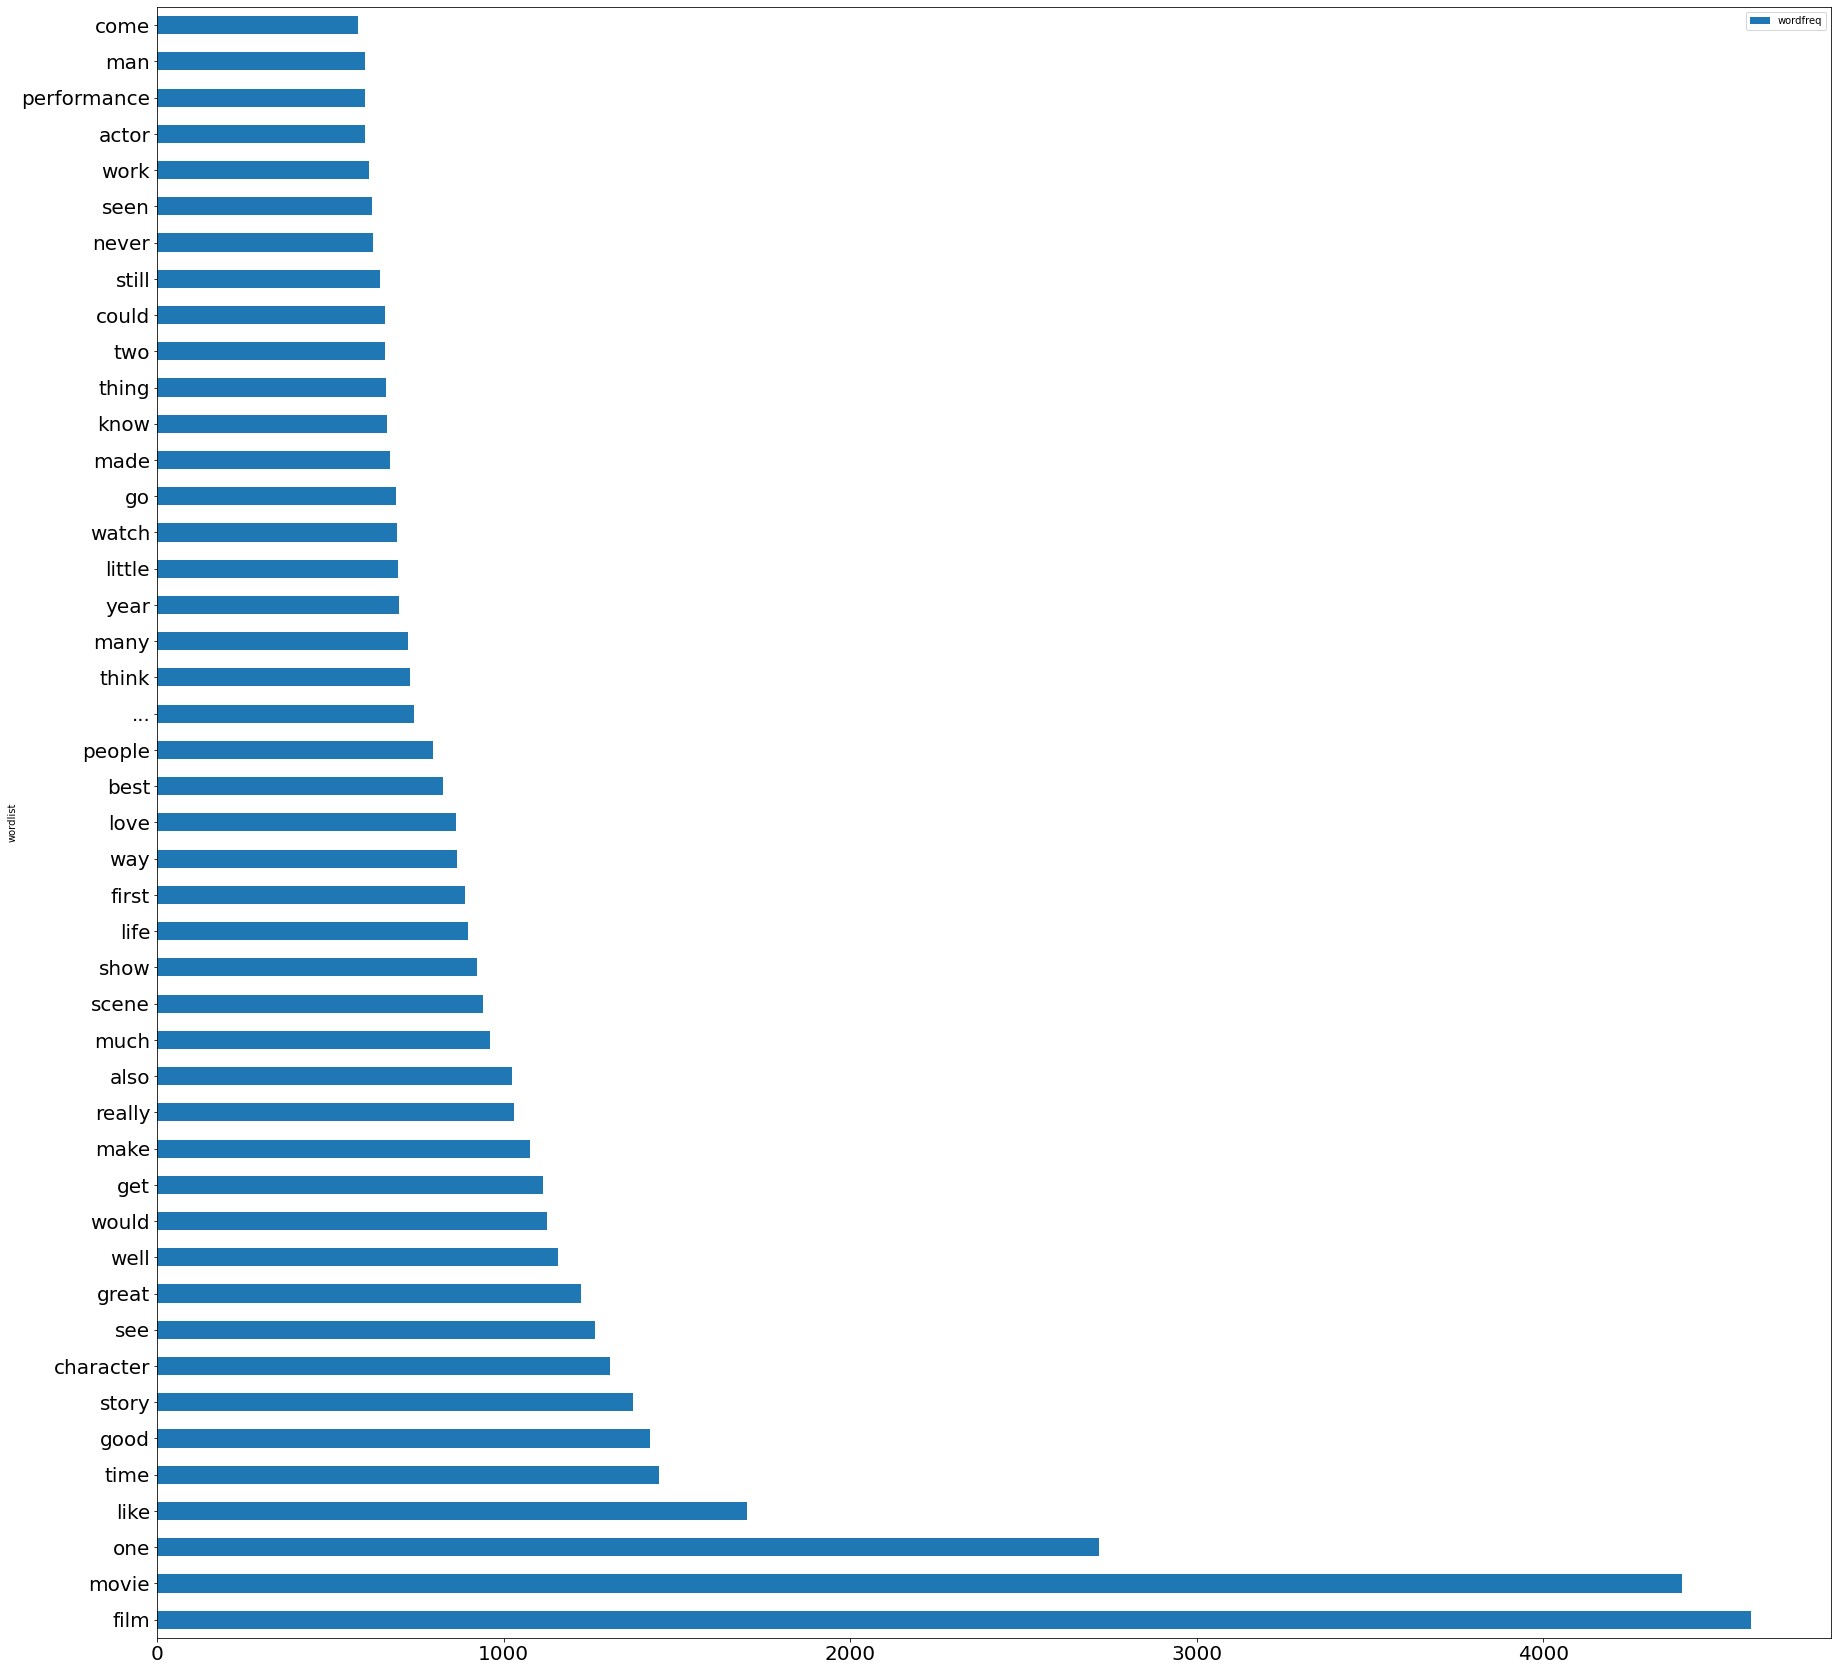

In [26]:
# Barchart
posbar_df = pos_df.loc[0:50, ["wordlist", "wordfreq"]]
posbar_df.plot.barh(x="wordlist", y="wordfreq", figsize=(30,30), fontsize=20)

analysis fluff

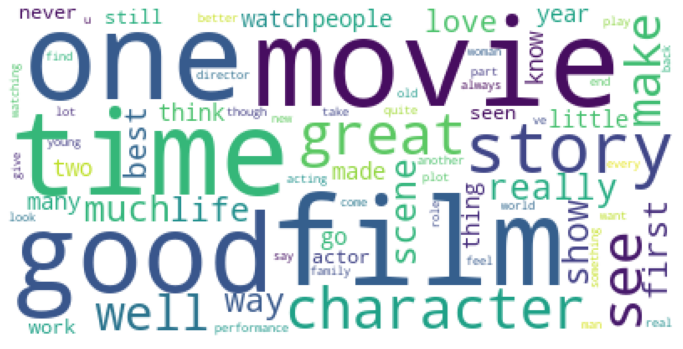

In [110]:
#generate a basic wordcloud for most frequently used positive words
from wordcloud import WordCloud
poswordfreq = pos_df["wordlist"].to_json()[:1000]
poswordfreqcloud = WordCloud(background_color="white").generate(poswordfreq)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(poswordfreqcloud)

#to remove the axis value
plt.axis("off")
plt.show()

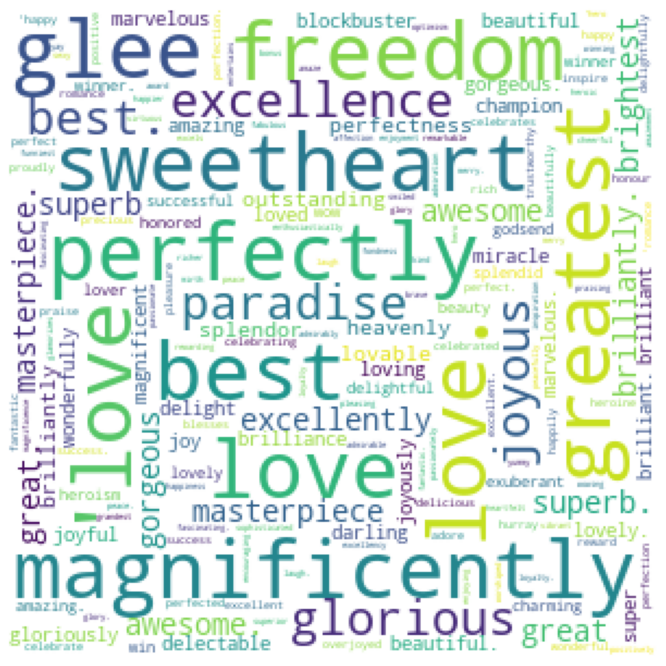

In [129]:
#generate a basic wordcloud for positive word sentiment strength
poswordsent = pd.Series(positive_df.wordsent.values,index=positive_df.wordlist).to_dict()
poswordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(poswordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(poswordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

##### Negative Reviews
fluff about next section on negative words

In [77]:
# Look only at the negative reviews
reviews = ""
for ind in range(5000):
    if imdb_df["sentiment"][ind] == "negative":
        reviews = reviews + " " + imdb_df["review"][ind]
stop_words = stopwords.words("english") + list(punctuation)
words = word_tokenize(reviews.lower())
completewords = [w for w in words if w not in stop_words]
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]
freq = FreqDist(completestemmed)
negwordlist = []
negwordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    negwordlist.append(i)
    negwordfreq.append(freq[i])
neg_df = pd.DataFrame({'wordlist':negwordlist, 'wordfreq':negwordfreq})
neg_df

,wordlist,wordfreq
0,br,10836
1,'s,5831
2,movie,5726
3,film,4334
4,n't,4076
...,...,...
29968,extracted,1
29969,brutalizing,1
29970,unscarred,1
29971,mastroianni-movie,1


In [78]:
# Clean up dataframe and drop weird words
neg_df = neg_df.drop(labels=0)
neg_df = neg_df.drop(labels=1)
neg_df = neg_df.drop(labels=4)
neg_df = neg_df.drop(labels=5)
neg_df = neg_df.drop(labels=6)
neg_df = neg_df.drop(labels=19)
neg_df[:30]

,wordlist,wordfreq
2,movie,5726
3,film,4334
7,one,2584
8,like,2291
9,even,1606
10,would,1580
11,good,1508
12,bad,1484
13,character,1433
14,get,1431


what do these words tell us?

<AxesSubplot:ylabel='wordlist'>

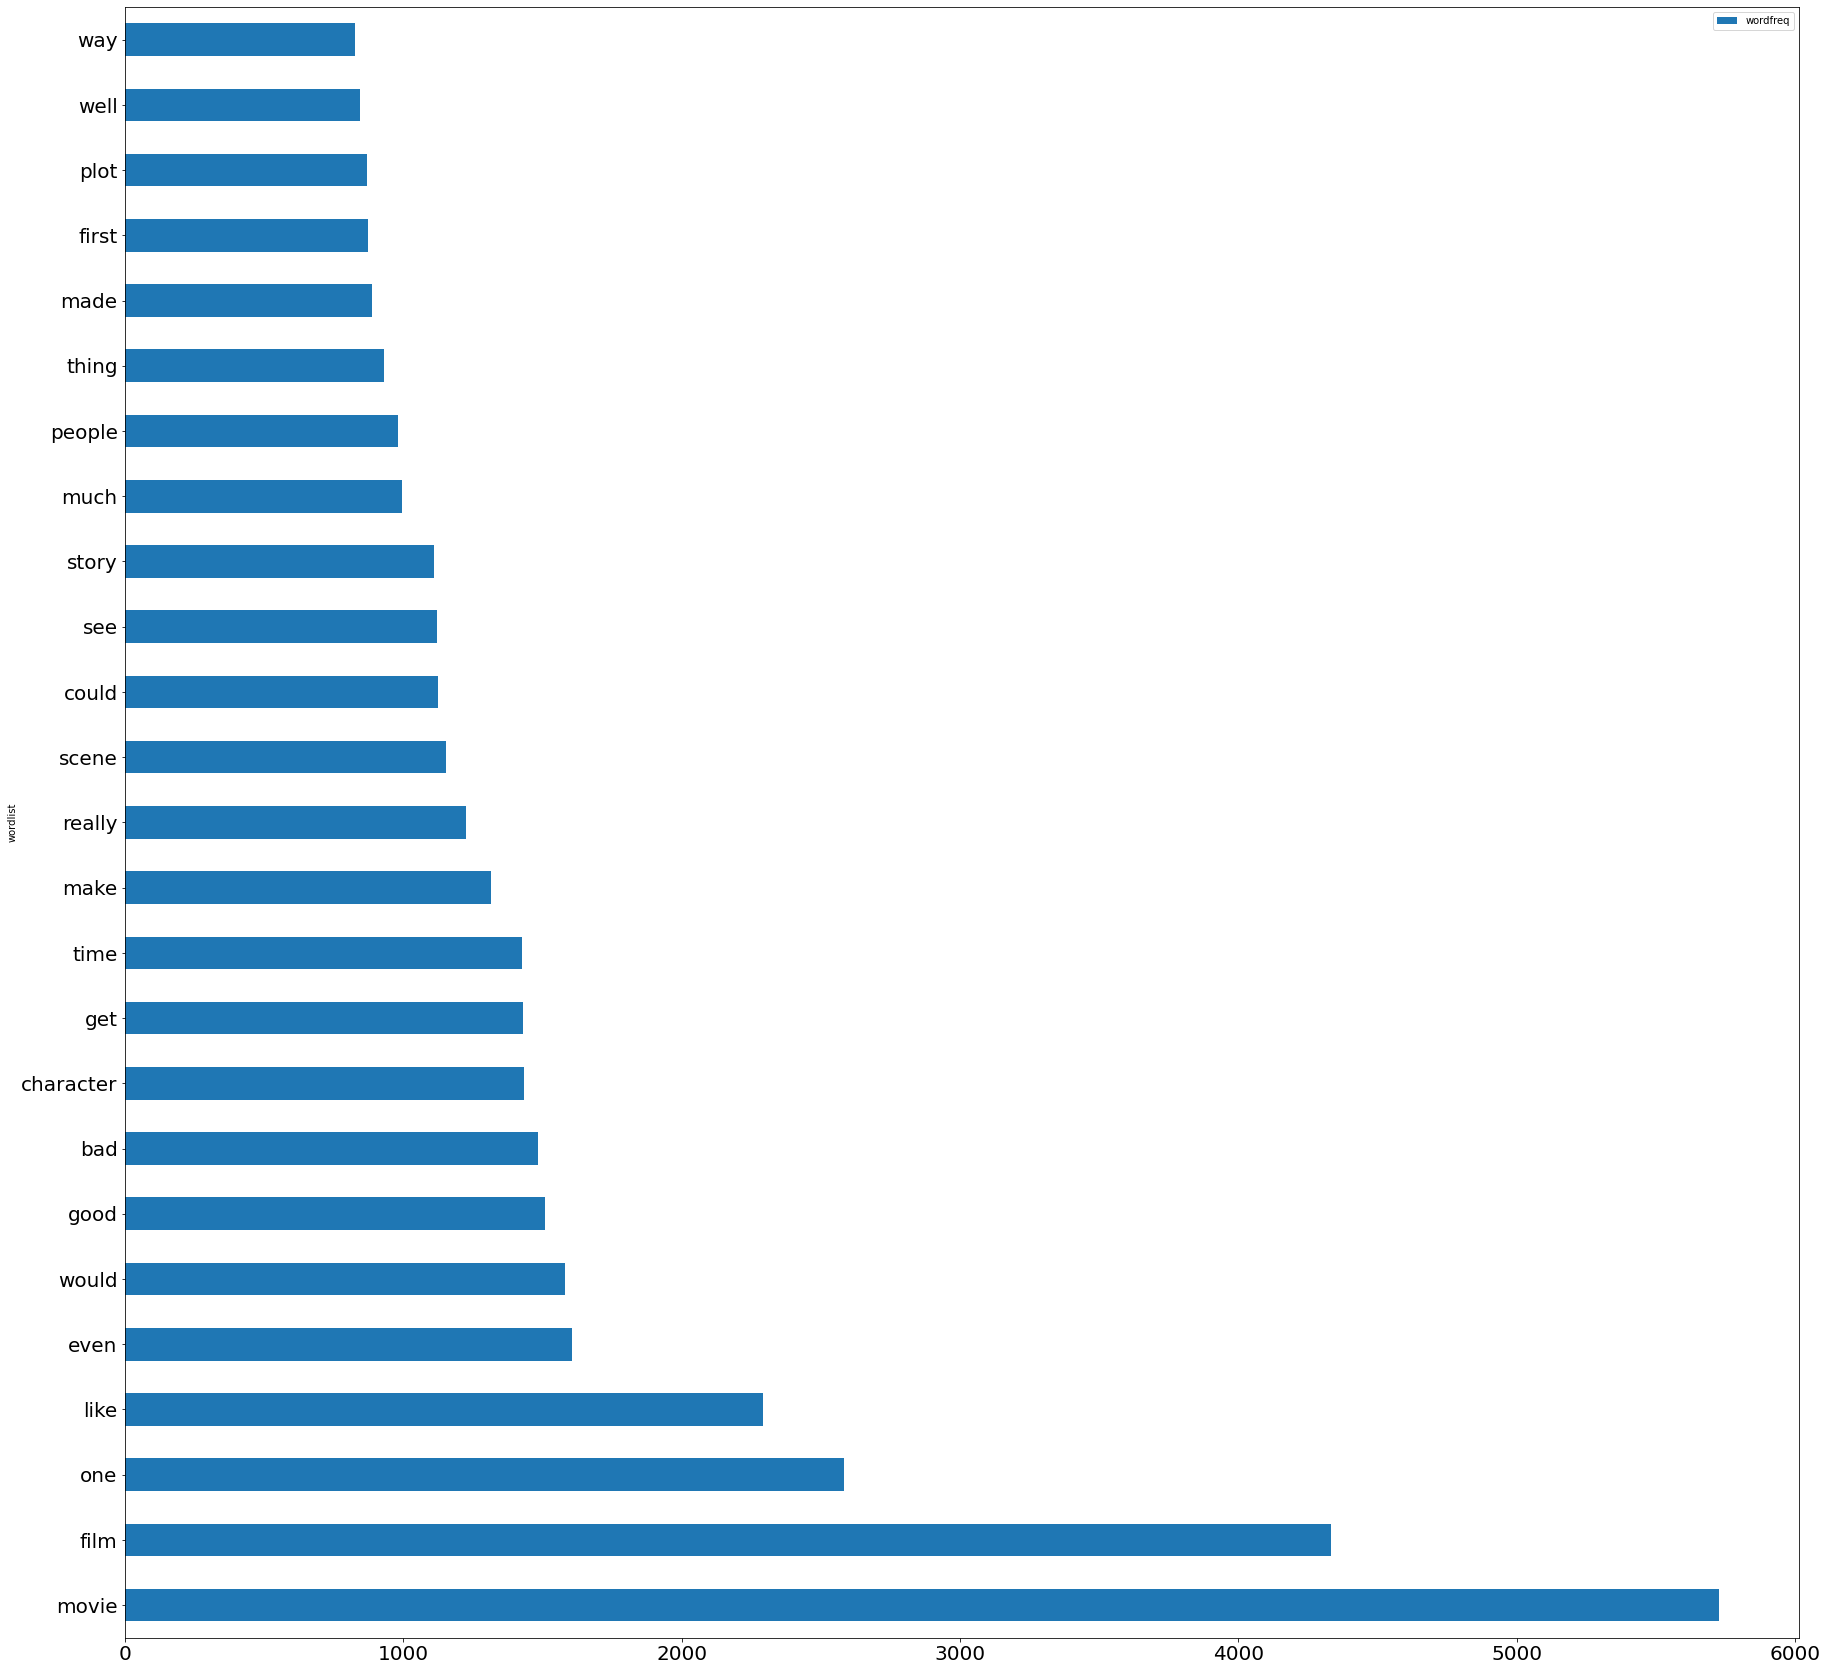

In [80]:
# Barchart
negbar_df = neg_df.loc[0:30, ["wordlist", "wordfreq"]]
negbar_df.plot.barh(x="wordlist", y="wordfreq", figsize=(30,30), fontsize=20)

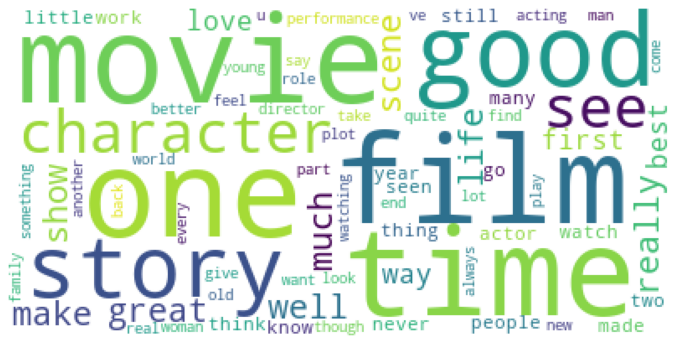

In [113]:
#generate a basic wordcloud for most frequently used negative words
from wordcloud import WordCloud
negwords = neg_df["wordlist"].to_json()[:1000]
negwordcloud = WordCloud(background_color="white").generate(negwords)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(poswordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

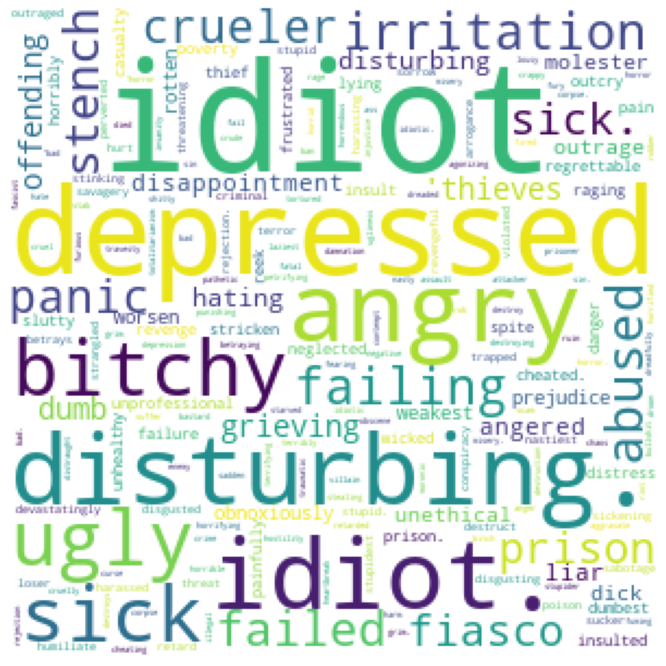

In [130]:
#generate a basic wordcloud for negative word sentiment strength
negwordsent = pd.Series(negative_df.wordsent.values,index=negative_df.wordlist).to_dict()
negwordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(negwordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(negwordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

In [131]:
negwordsent

{'rapist': -0.7096,
 'slavery': -0.7003,
 'rape': -0.6908,
 'murder': -0.6908,
 'kill': -0.6908,
 'terrorist': -0.6908,
 'fu': -0.6908,
 'raped': -0.6808,
 'hell.': -0.6808,
 'hell': -0.6808,
 'terrorism': -0.6808,
 'murderer': -0.6808,
 'suicidal': -0.6705,
 'suicide': -0.6705,
 'killed': -0.6705,
 'catastrophe': -0.6597,
 'evil.': -0.6597,
 'murdered': -0.6597,
 'killing': -0.6597,
 'devil': -0.6597,
 'evil': -0.6597,
 'horrific': -0.6597,
 "'villains": -0.6597,
 'cancer': -0.6597,
 'killing.': -0.6597,
 'tragedy': -0.6597,
 'murdering': -0.6486,
 'killer.': -0.6486,
 'terrorize': -0.6486,
 'heartbroken': -0.6486,
 'devastating': -0.6486,
 'killer': -0.6486,
 'dead': -0.6486,
 'whore': -0.6486,
 'dead.': -0.6486,
 'kia': -0.6369,
 'fatally': -0.6369,
 'abuse.': -0.6369,
 'hellish': -0.6369,
 'pissed': -0.6369,
 'abusive': -0.6369,
 'hatred': -0.6369,
 'abuse': -0.6369,
 'betray': -0.6369,
 'murderous': -0.6369,
 'hated': -0.6369,
 'doomed': -0.6369,
 'vile': -0.6249,
 "'worst": -0.62

analysis fluff

We can see that in the reviews with negative sentiment, they are using very succinct words such as good or bad. This is probably due to the fact that the reviewer didn't like the movie so they don't want to waste time writing an indepth review about the movie. However, you look at the most frequent words for reviews with positive sentiment and you can see similar succint words. It turns out succinct words are just positive in general but the positive sentiment reviews includes more synonomous with good such as great or love.

#### Sentiment Analysis

fluff stuffs

In [89]:
sia = vader.SentimentIntensityAnalyzer()

In [95]:
k = 0
data = []
for index, row in imdb_df.iterrows():
    while k < 50:
        review = imdb_df["review"].iloc[k]
        print(imdb_df["sentiment"].iloc[k])
        print(sia.polarity_scores(review))
        # print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        data.append(sia.polarity_scores(review)["compound"])
        k+=1
data[:50]

["Review 0's compound polarity score is -0.9951",
 "Review 1's compound polarity score is 0.9641",
 "Review 2's compound polarity score is 0.9605",
 "Review 3's compound polarity score is -0.9213",
 "Review 4's compound polarity score is 0.9744",
 "Review 5's compound polarity score is 0.9828",
 "Review 6's compound polarity score is 0.9022",
 "Review 7's compound polarity score is 0.8596",
 "Review 8's compound polarity score is 0.2362",
 "Review 9's compound polarity score is 0.9149",
 "Review 10's compound polarity score is 0.9482",
 "Review 11's compound polarity score is 0.5223",
 "Review 12's compound polarity score is -0.9721",
 "Review 13's compound polarity score is 0.3425",
 "Review 14's compound polarity score is 0.6168",
 "Review 15's compound polarity score is -0.6993",
 "Review 16's compound polarity score is 0.3506",
 "Review 17's compound polarity score is -0.9868",
 "Review 18's compound polarity score is 0.6518",
 "Review 19's compound polarity score is 0.945",
 "Revi

# Why are some reviews interpreted as positive even though they are negative?

Certain reviews are interpreted as positive even though the sentiment value is negative or negative even though the sentiment value is positive. When looking at the polarity scores, we can see that most of the movie reviews have a high neutral score. That means that the IMDB movie reviews are not very polarizing and are looking at bot the pros and the cons of the movie so it is confusing for the Vader sentiment analysis. We can look at one of these reviews such as the one at index 0. 

*One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.*  

This review mentions the brutality of Oz and that even though the reviewer became accustomed to it, they recognize that it is uncomfortable to watch in the beginning. As someone reading this review, we can tell that the reviewer liked it which is why the sentiment is considered positive in the database. However, Vader sees words such as uncomfortable, brutality, not, injustice, violence, etc. and decides that this review is leaning towards negative rather than positive. Vader is by no means a perfect algorithm and messes up when reviews are slightly ambiguous such as this one. The next cell will look at how accurate Vader was in analyzing the sentiment of all the movie reviews.

In [ ]:
# Calculate the number of true positives and true negatives in the dataframe
truths = 0
for index, row in imdb_df.iterrows():
    review = row["review"]
    if sia.polarity_scores(review)["compound"] > 0 and row["sentiment"] == "positive":
        truths += 1
    if sia.polarity_scores(review)["compound"] < 0 and row["sentiment"] == "negative":
        truths += 1
        
# Divide the number of true positives and true negatives by the size of the dataframe
print(truths/imdb_df.size)

# Accuracy of Vader

The Vader sentiment analysis only got an accuracy of 34.799 percent against the IMDB dataset. Despite the poor accuracy, this doesn't mean Vader isn't a good algorithm, it's just that Vader is not powerful enough for this type of dataset. We can look at the accuracy of Sentiwordnet next.

In [ ]:
# Calculating overall accuracy of Sentiwordnet

from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation

myStopWords = list(punctuation) + stopwords.words('english')

def naiveSentiment(review):
    reviewPolarity = 0.0
    words = [w for w in word_tokenize(review.lower()) if w not in myStopWords]
    for word in words:
        sentScore = 0.0
        if len(list(swn.senti_synsets(word))) > 0:
            for i in list(swn.senti_synsets(word)):
                if i.pos_score() > i.neg_score():
                    sentScore += i.pos_score()
                else:
                    sentScore -= i.neg_score()
            reviewPolarity += sentScore / len(list(swn.senti_synsets(word)))
    
    return reviewPolarity

truths = 0
for index, row in imdb_df.iterrows():
    review = row["review"]
    if naiveSentiment(review) > 0 and row["sentiment"] == "positive":
        truths += 1
    if naiveSentiment(review) < 0 and row["sentiment"] == "negative":
        truths += 1
        
print(truths/imdb_df.size)

# Accuracy of Sentiwordnet

The Sentiwordnet algorithm got an accuracy of 33.101 percent so it seems to be slightly worse than the Vader algorithm. However, that might change if we parse the words in each sentence more carefully and remove weird "words" like "" or br. 

In [98]:
# put compound polarity scores in a dataframe
compound_df = pd.DataFrame(compound[:50])
compound_df

,0
0,-0.9951
1,0.9641
2,0.9605
3,-0.9213
4,0.9744
5,0.9828
6,0.9022
7,0.8596
8,0.2362
9,0.9149


<AxesSubplot:ylabel='Frequency'>

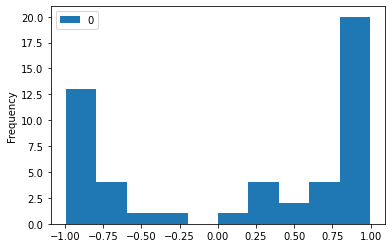

In [99]:
#histogram of the compound polarity scores
compound_df.plot(kind='hist')

analysis fluff

#### Positive Reviews - Sentiment

next section on positive scores

In [100]:
#looking at only polarity scores labeled as "positive"
grouped = imdb_df.groupby(imdb_df.sentiment)

positive = grouped.get_group("positive")
positive

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
49983,"I loved it, having been a fan of the original ...",positive
49985,Imaginary Heroes is clearly the best film of t...,positive
49989,I got this one a few weeks ago and love it! It...,positive
49992,John Garfield plays a Marine who is blinded by...,positive


In [101]:
k = 0
posdata = []
for index, row in positive.iterrows():
    while k < 50:
        review = positive["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        posdata.append(sia.polarity_scores(review)["compound"])
        k+=1

Review 0's compound polarity score is -0.9951
Review 1's compound polarity score is 0.9641
Review 2's compound polarity score is 0.9605
Review 3's compound polarity score is 0.9744
Review 4's compound polarity score is 0.9828
Review 5's compound polarity score is 0.9022
Review 6's compound polarity score is 0.9149
Review 7's compound polarity score is 0.6168
Review 8's compound polarity score is 0.3506
Review 9's compound polarity score is 0.6518
Review 10's compound polarity score is 0.5425
Review 11's compound polarity score is 0.7948
Review 12's compound polarity score is 0.954
Review 13's compound polarity score is 0.9962
Review 14's compound polarity score is -0.987
Review 15's compound polarity score is -0.9907
Review 16's compound polarity score is -0.6485
Review 17's compound polarity score is 0.9971
Review 18's compound polarity score is 0.9838
Review 19's compound polarity score is 0.9858
Review 20's compound polarity score is 0.9182
Review 21's compound polarity score is 0.9

<AxesSubplot:ylabel='Frequency'>

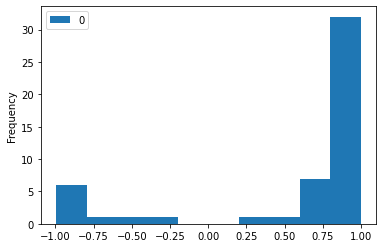

In [20]:
posdata_df = pd.DataFrame(posdata)
posdata_df.plot(kind='hist')

analysis fluff

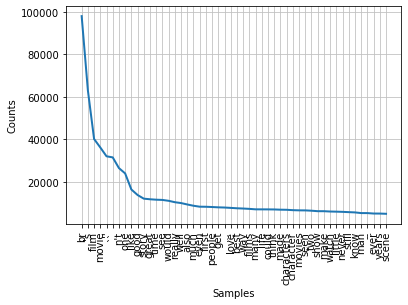

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
positiveFreq.plot(50,cumulative=False)

fluff

stuff about negative section

In [22]:
grouped = imdb_df.groupby(imdb_df.sentiment)

negative = grouped.get_group("negative")
negative

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [23]:
k = 0
negdata = []
for index, row in negative.iterrows():
    while k < 50:
        review = negative["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        negdata.append(sia.polarity_scores(review)["compound"])
        k+=1

Review 0's compound polarity score is -0.9213
Review 1's compound polarity score is 0.8596
Review 2's compound polarity score is 0.2362
Review 3's compound polarity score is 0.9482
Review 4's compound polarity score is 0.5223
Review 5's compound polarity score is -0.9721
Review 6's compound polarity score is 0.3425
Review 7's compound polarity score is -0.6993
Review 8's compound polarity score is -0.9868
Review 9's compound polarity score is 0.945
Review 10's compound polarity score is -0.9755
Review 11's compound polarity score is 0.899
Review 12's compound polarity score is -0.7602
Review 13's compound polarity score is -0.8481
Review 14's compound polarity score is -0.9208
Review 15's compound polarity score is -0.9604
Review 16's compound polarity score is 0.7133
Review 17's compound polarity score is -0.9399
Review 18's compound polarity score is -0.962
Review 19's compound polarity score is -0.9847
Review 20's compound polarity score is 0.9797
Review 21's compound polarity score

<AxesSubplot:>

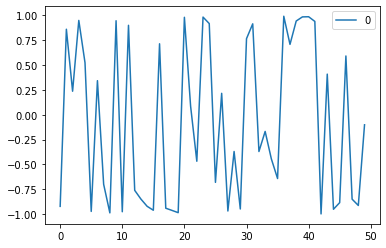

In [24]:
negdata_df = pd.DataFrame(negdata)
negdata_df.plot(kind='line')

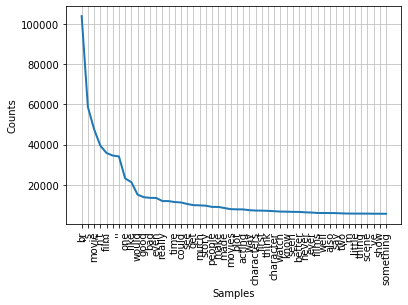

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
negfreq.plot(50,cumulative=False)

In [26]:
posdata_df.mean()

0    0.58517
dtype: float64

In [27]:
negdata_df.mean()

0   -0.076252
dtype: float64

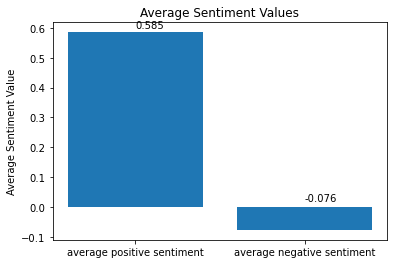

In [28]:
n=1
r = np.arange(n)
width = 0.25

x = [posdata_df.mean()[0], negdata_df.mean()[0]]

ax1 = plt.subplot()
ax1.set_xticks([1,2])

# plt.bar(r, posdata_df.mean(), color = 'b',
#         width = width, edgecolor = 'black',
#         label='average positive sentiment')
# plt.bar(r + width, negdata_df.mean(), color = 'r',
#         width = width, edgecolor = 'black',
#         label='average negative sentiment')
plt.bar([1,2], x)

ax1.set_xticklabels(['average positive sentiment', 'average negative sentiment'])
plt.ylabel("Average Sentiment Value")
  
plt.title("Average Sentiment Values")  
plt.text(1, 0.6, str(round(x[0], 3)))
plt.text(2, 0.02, str(round(x[1], 3)))
  
plt.show()

words here

In [29]:
k = 0
posdata = []
for index, row in positive.iterrows():
    while k < 50:
        review = positive["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        posdata.append(sia.polarity_scores(review)["compound"])
        k+=1

Review 0's compound polarity score is -0.9951
Review 1's compound polarity score is 0.9641
Review 2's compound polarity score is 0.9605
Review 3's compound polarity score is 0.9744
Review 4's compound polarity score is 0.9828
Review 5's compound polarity score is 0.9022
Review 6's compound polarity score is 0.9149
Review 7's compound polarity score is 0.6168
Review 8's compound polarity score is 0.3506
Review 9's compound polarity score is 0.6518
Review 10's compound polarity score is 0.5425
Review 11's compound polarity score is 0.7948
Review 12's compound polarity score is 0.954
Review 13's compound polarity score is 0.9962
Review 14's compound polarity score is -0.987
Review 15's compound polarity score is -0.9907
Review 16's compound polarity score is -0.6485
Review 17's compound polarity score is 0.9971
Review 18's compound polarity score is 0.9838
Review 19's compound polarity score is 0.9858
Review 20's compound polarity score is 0.9182
Review 21's compound polarity score is 0.9

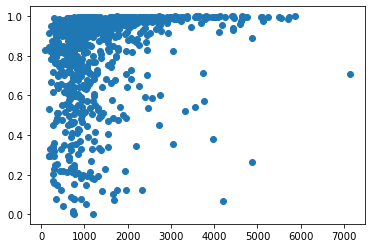

In [32]:
#see how review polarity impacts its length
rlength = []
polarity = []
limit = 1000
for ind in range(len(imdb_df["review"])):
    if ind > limit:
        break
    review = imdb_df["review"][ind]
    rlength.append(len(imdb_df["review"][ind]))
    polarity.append(abs(sia.polarity_scores(review)["compound"]))
    #print(len(imdb_df["review"][ind]))
    #print(abs(sia.polarity_scores(review)["compound"]))

plt.scatter(rlength, polarity)
plt.show()

One of our introductory questions was with regard to how people might be more voluminous depending on strength of sentiment – can we make conclusions about that from the data? 

Yes, the plot above shows review length vs. polarity. Review length is measured in number of words in the x-axis, and polarity is measured as an absolute value in the y-axis. As we can see, very long reviews generally have very high polarity scores, regardless of whether the scores are negative or positive. However, some short reviews are also highly polar, and exhibit the same high absolute values for their polarity scores. Therefore, although we cannot make an absolute correlation that short reviews are usually not as polar as long reviews, we can definitely see that most of the time, very long reviews show a high polarity score. This make sense intuitively, since most people wouldn't care to take such a large effort in writing long reviews unless they really loved or really hated the movie. 

### Discussion 
(what does your analysis show, what is the big picture, and how are these findings useful?)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Duis vitae augue justo. In vitae ligula eleifend, accumsan sapien ut, cursus odio. Nunc id tincidunt turpis. Nulla faucibus massa ut ipsum ultricies pulvinar at sodales turpis. Nunc vitae porttitor orci. Praesent a mauris vel felis accumsan euismod ultrices nec risus. Vivamus ligula sapien, blandit in nunc eu, tincidunt posuere quam. Aenean quis venenatis lorem, non tempor purus. Sed sapien velit, scelerisque quis accumsan non, volutpat id odio. In sollicitudin diam a felis volutpat varius. Quisque fermentum augue nisi, sit amet porttitor augue mollis id. Phasellus dictum magna ac tellus molestie, ac dictum dui dapibus.

### Team Member Contributions
If you are working in a group, the end must describe each group member's contribution to
this final project (one sentence each).

#### Crystal Huynh
filler text

#### Larry Qu
filler text

#### Nelson Truong
filler text